# 🚗 Used Car Analytics
A data analysis project using the OSEMN framework on pre-owned cars dataset.


## 📌 Problem Statement
This project explores and analyzes a dataset of pre-owned cars with the goal of understanding pricing trends, identifying top-selling brands, and building a predictive model for estimating car prices.

## 🎯 Goals:
- Clean and preprocess the data
- Explore brand and pricing patterns
- Build a regression model to predict car prices
- Interpret the most impactful features


# <span style="color:red">Obtain</span>

In [88]:
import pandas as pd

# Load the dataset
df = pd.read_csv('pre-owned cars.csv')

# Display the first few rows
df.head()


,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


# <span style="color:blue">Scrub</span>

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

In [90]:
df.drop('reg_year',axis=1,inplace=True)

In [91]:
df=df.dropna(subset=['brand','model'])

In [92]:
df.drop('overall_cost',axis=1,inplace=True)

In [93]:
#converting make_year from float to integer
df['make_year'] = pd.to_numeric(df['make_year'], errors='coerce')
df = df.dropna(subset=['make_year'])
df['make_year'] = df['make_year'].astype(int)


## <span style="color:green">Explore</span>

### Average car prices over the years 

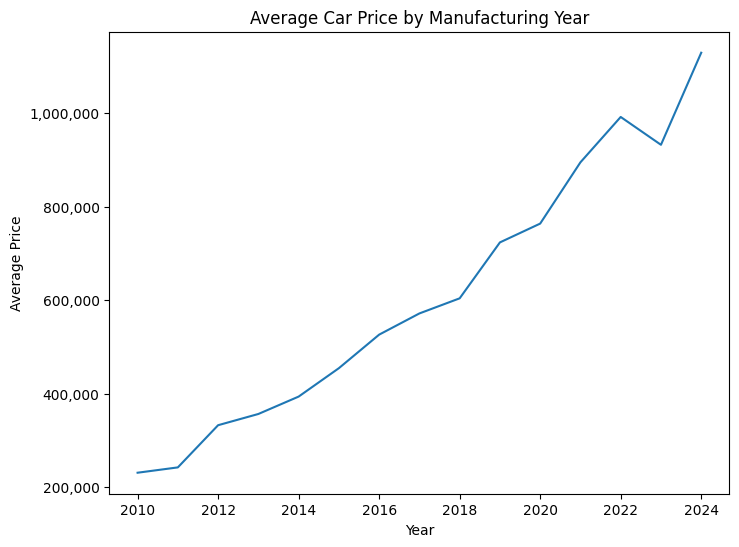

In [94]:
import matplotlib.ticker as mtick

plt.figure(figsize=(8, 6))
sns.lineplot(x='make_year', y='price', data=avg_price_by_year_df)
plt.title('Average Car Price by Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Format y-axis to display integers with no decimals
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


### Top Models by Count

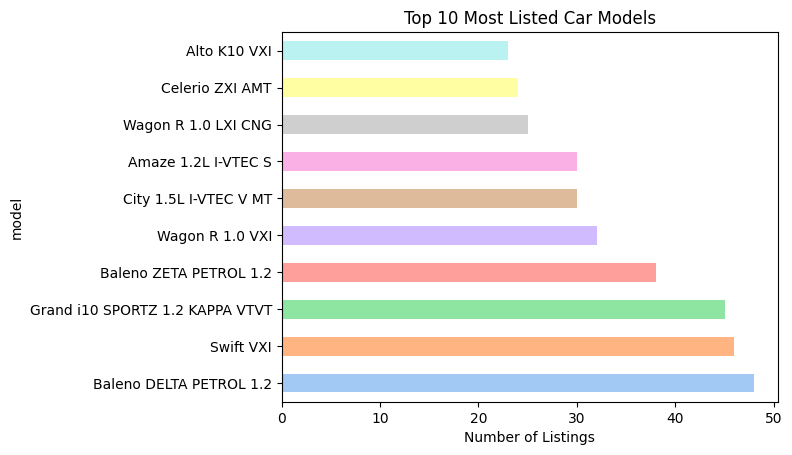

In [109]:
colors = sns.color_palette("pastel", 10)
top_models = df['model'].value_counts().head(10)
top_models.plot(kind='barh', color=colors,title='Top 10 Most Listed Car Models')
plt.xlabel('Number of Listings')
plt.show()


### Market share of brands by Quantity

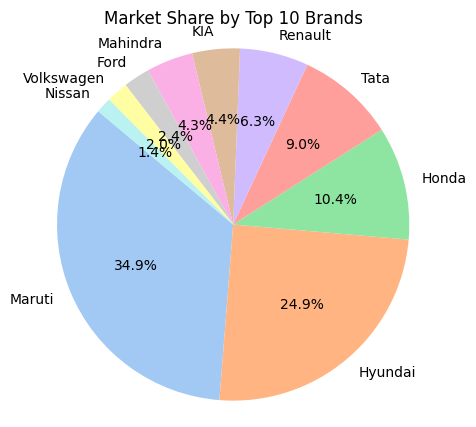

In [117]:
brand_counts = df['brand'].value_counts()
colors = sns.color_palette('pastel', n_colors=10)
plt.figure(figsize=(5, 5))
plt.pie(brand_counts[:10], labels=brand_counts.index[:10], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Market Share by Top 10 Brands')
plt.axis('equal')
plt.show()


### Price Distribution by ownership

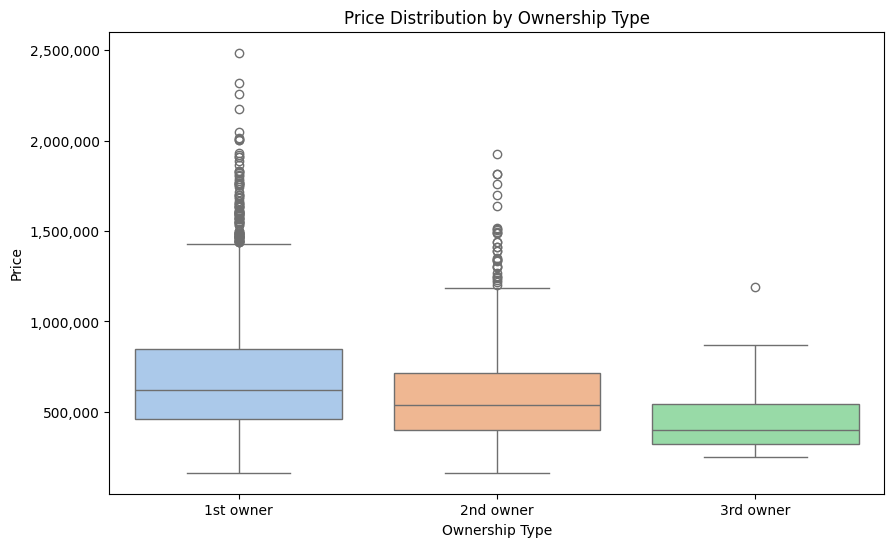

In [121]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel', n_colors=3)
sns.boxplot(x='ownership', y='price', data=df, hue='ownership',palette=colors)
plt.title('Price Distribution by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


### Prices by Transmission Type

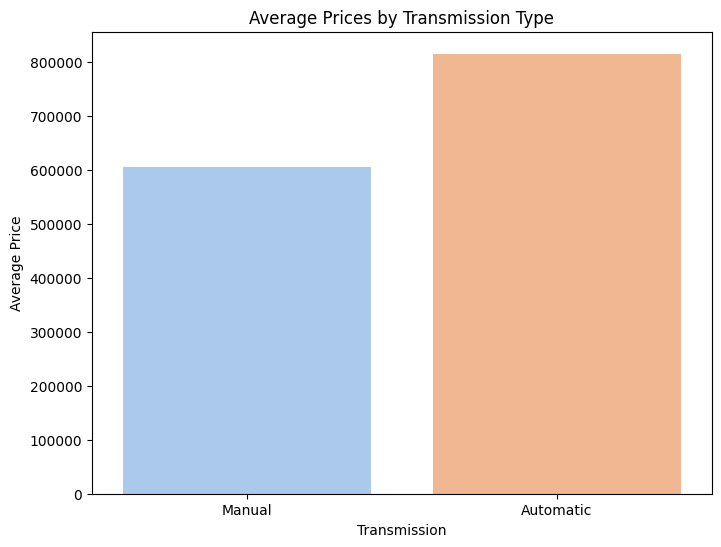

In [114]:
plt.figure(figsize=(8, 6))
sns.barplot(x='transmission', y='price', data=df, hue='transmission', palette='pastel', errorbar=None)
plt.title('Average Prices by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.show()


### Price vs Mileage

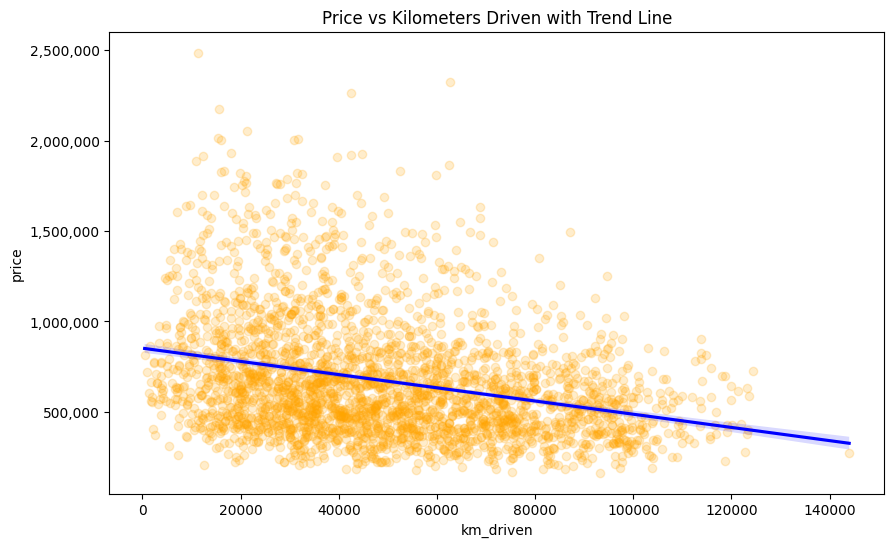

In [122]:
plt.figure(figsize=(10, 6))
sns.regplot(x='km_driven', y='price', data=df, scatter_kws={'alpha':0.2, 'color':'orange'}, line_kws={'color': 'blue'})
plt.title("Price vs Kilometers Driven with Trend Line")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


### Fuel type by market share

<Axes: ylabel='count'>

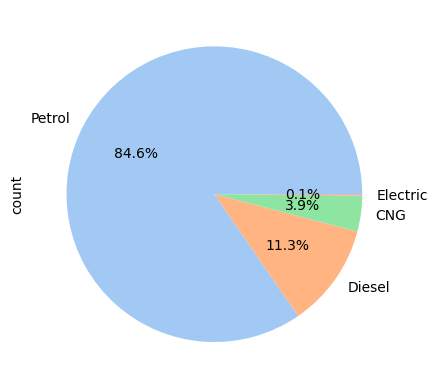

In [123]:
colors = sns.color_palette('pastel', n_colors=4)
df['fuel_type'].value_counts().plot.pie(autopct='%1.1f%%',colors=colors)


### Fuel type vs Price

Text(0.5, 1.0, 'Average Price by Fuel Type')

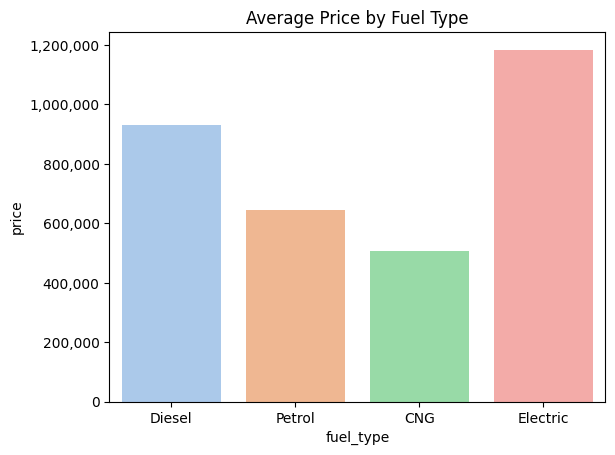

In [125]:
import numpy as np
sns.barplot(x='fuel_type', y='price', data=df, estimator=np.mean,hue='fuel_type', palette='pastel',errorbar=None)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Average Price by Fuel Type')


# <span style="color: #e7ea08">Modeling</span>

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Drop rows with any NaNs in X or y
X = X.dropna()
y = y.loc[X.index]  # Align y to X after dropping

# Ensure X and y are numeric (in case of dtype issues)
X = X.astype(float)
y = y.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R2 Score: -151.68484119024336
RMSE: 4260119.708983559


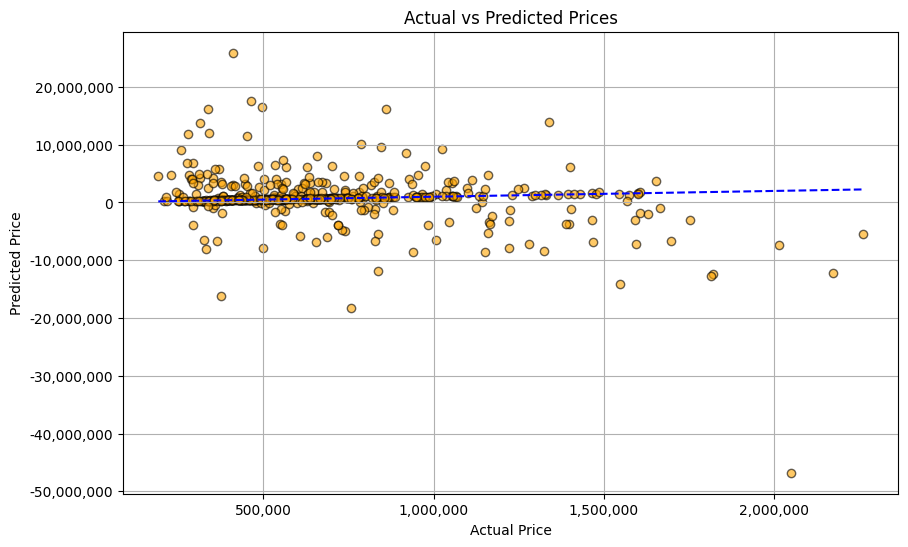

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k',color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


# 📈 Conclusion
- Brand and year have a significant impact on car price.
- The linear regression model gives a basic estimate of prices but could be improved with advanced techniques.
- Further analysis with tree-based models may yield better performance.
